In [23]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data = "data/mouse_drug_data.csv"
clinical_trial_data= "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug = pd.read_csv(mouse_drug_data)
clinical_trial = pd.read_csv(clinical_trial_data)


# Combine the data into a single dataset

pymaceuticals_df = pd.merge(mouse_drug,clinical_trial, how="outer", on=["Mouse ID"])
# Display the data table for preview

#pymaceuticals = pymaceuticals_df["Mouse ID"].unique()
#pymaceuticals
pymaceuticals_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [24]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
#tumor_count=len(pymaceuticals_df[''].unique())
#math_grade_9th=school_data_complete.loc[school_data_complete['grade']=="9th"].groupby("school_name").mean()['math_score']
tumor_table=pymaceuticals_df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"]
tumor_mean = tumor_table.mean()
# Convert to DataFrame
tumor_mean_df = pd.DataFrame(tumor_mean)
tumor_mean_df.reset_index(inplace=True)
# Preview DataFrame
tumor_mean_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [25]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_sem = tumor_table.sem()
# Convert to DataFrame

tumor_sem_df=pd.DataFrame(tumor_sem)
# Preview DataFrame

tumor_sem_df.reset_index(inplace=True)
tumor_sem_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [26]:
# to get the value of yerr
# Minor Data Munging to Re-Format the Data Frames
pivot_table_sem = tumor_sem_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
pivot_table_sem.head()

# Preview that Reformatting worked
pivot_sem_df=pd.DataFrame(pivot_table_sem)
pivot_sem_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [27]:
# Minor Data Munging to Re-Format the Data Frames
pivot_table = tumor_mean_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
pivot_table.head()
pivot_df=pd.DataFrame(pivot_table)
pivot_df


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [28]:
# Generate the Plot (with Error Bars)

# Save the Figure



In [29]:
# Show the Figure
#plt.show()

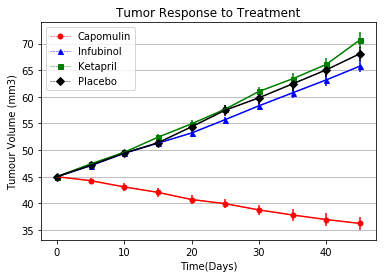

In [30]:
x_axis=pivot_df.index.values
y_capomulin=pivot_df["Capomulin"]
y_Infubinol=pivot_df["Infubinol"]
y_Ketapril=pivot_df["Ketapril"]
y_Placebo=pivot_df["Placebo"]

xerr=0.1
yerr=pivot_sem_df["Capomulin"]

fig, ax = plt.subplots()

ax.errorbar(x_axis, y_capomulin, xerr=xerr, yerr=yerr,  color='red')
Capomulin,=plt.plot(x_axis,y_capomulin,color="red",marker='o',markersize=5, linestyle='--', linewidth=0.5)

yerr=pivot_sem_df["Infubinol"]
ax.errorbar(x_axis, y_Infubinol, xerr=xerr, yerr=yerr, color='blue')
Infubinol,=plt.plot(x_axis,y_Infubinol,color="blue", marker='^',markersize=5, linestyle='--', linewidth=0.5)

yerr=pivot_sem_df["Ketapril"]
ax.errorbar(x_axis, y_Ketapril, xerr=xerr, yerr=yerr,  color='green')
Ketapril,=plt.plot(x_axis,y_Ketapril,color="green",marker='s',markersize=5, linestyle='--', linewidth=0.5)

yerr=pivot_sem_df["Placebo"]
ax.errorbar(x_axis, y_Placebo, xerr=xerr, yerr=yerr, color='black')
Placebo,=plt.plot(x_axis,y_Placebo,color="black",marker='D', markersize=5, linestyle='--', linewidth=0.5)


ax.set_xlabel('Time(Days)')
ax.set_ylabel('Tumour Volume (mm3)')
ax.set_title('Tumor Response to Treatment')
ax.yaxis.grid(True)
plt.legend(handles=[Capomulin,Infubinol,Ketapril,Placebo],loc="best")
# Save the Figure
plt.savefig("Images/Tumorvolume.png")
#plt.tight_layout()
plt.show()

## Metastatic Response to Treatment

In [31]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_treat=pymaceuticals_df.groupby(["Drug","Timepoint"])['Metastatic Sites']
meta_mean=meta_treat.mean()
# Convert to DataFrame
meta_df = pd.DataFrame(meta_mean)
#print(meta_df)
# Preview DataFrame
meta_df.reset_index(inplace=True)
meta_df.head()



,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [32]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_sem = meta_treat.sem()
# Convert to DataFrame
meta_sem_df=pd.DataFrame(meta_sem)
# Preview DataFrame
meta_sem_df.reset_index(inplace=True)
meta_sem_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [33]:
# to get the value of yerr
pivot_meta_sem = meta_sem_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
pivot_meta_sem.head()
#print(pivot_meta_sem)
# Preview the Data Frame
pivot_meta_sem_df=pd.DataFrame(pivot_meta_sem)
#pivot_meta_sem_df.head()


In [34]:
# Minor Data Munging to Re-Format the Data Frames
pivot_meta = meta_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
pivot_meta.head()
# Preview the Data Frame
pivot_meta_df=pd.DataFrame(pivot_meta)
pivot_meta_df


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


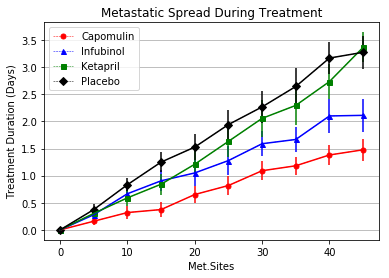

In [35]:
x_axis=pivot_df.index.values
y_capomulin=pivot_meta_df["Capomulin"]
y_Infubinol=pivot_meta_df["Infubinol"]
y_Ketapril=pivot_meta_df["Ketapril"]
y_Placebo=pivot_meta_df["Placebo"]

xerr=0.1
yerr=pivot_meta_sem_df["Capomulin"]

fig, ax = plt.subplots()

ax.errorbar(x_axis, y_capomulin, xerr=xerr, yerr=yerr,  color='red')
Capomulin,=plt.plot(x_axis,y_capomulin,color="red",marker='o',markersize=5, linestyle='--', linewidth=0.5)

yerr=pivot_meta_sem_df["Infubinol"]
ax.errorbar(x_axis, y_Infubinol, xerr=xerr, yerr=yerr, color='blue')
Infubinol,=plt.plot(x_axis,y_Infubinol,color="blue", marker='^',markersize=5, linestyle='--', linewidth=0.5)

yerr=pivot_meta_sem_df["Ketapril"]
ax.errorbar(x_axis, y_Ketapril, xerr=xerr, yerr=yerr,  color='green')
Ketapril,=plt.plot(x_axis,y_Ketapril,color="green",marker='s',markersize=5, linestyle='--', linewidth=0.5)

yerr=pivot_meta_sem_df["Placebo"]
ax.errorbar(x_axis, y_Placebo, xerr=xerr, yerr=yerr, color='black')
Placebo,=plt.plot(x_axis,y_Placebo,color="black",marker='D', markersize=5, linestyle='--', linewidth=0.5)


ax.set_xlabel('Met.Sites')
ax.set_ylabel('Treatment Duration (Days)')
ax.set_title('Metastatic Spread During Treatment')
ax.yaxis.grid(True)
plt.legend(handles=[Capomulin,Infubinol,Ketapril,Placebo],loc="best")
# Save the Figure
plt.savefig("Images/Metastatic.png")
#plt.tight_layout()
plt.show()

In [36]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


## Survival Rates

In [37]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_data=pymaceuticals_df.groupby(["Drug","Timepoint"])["Mouse ID"].count()
# Convert to DataFrame
survival_df=pd.DataFrame(survival_data)
# Preview DataFrame
survival_df.reset_index(inplace=True)
survival_df.head()


,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [38]:
# Minor Data Munging to Re-Format the Data Frames
survival_pivot = survival_df.pivot(index='Timepoint', columns='Drug', values='Mouse ID')

survival_pivot_df=pd.DataFrame(survival_pivot)

# Preview the Data Frame
survival_pivot_df



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [39]:
total_count = len(pymaceuticals_df["Mouse ID"])
total_count
percentage_mouseId = (survival_df["Mouse ID"]/total_count)*100
percentage_mouseId

0     1.311647
1     1.311647
2     1.311647
3     1.259182
4     1.206716
5     1.154250
6     1.154250
7     1.154250
8     1.101784
9     1.101784
10    1.311647
11    1.101784
12    1.049318
13    0.996852
14    0.944386
15    0.944386
16    0.839454
17    0.734523
18    0.734523
19    0.682057
20    1.311647
21    1.311647
22    1.101784
23    1.101784
24    1.049318
25    0.944386
26    0.891920
27    0.629591
28    0.524659
29    0.472193
        ...   
70    1.311647
71    1.311647
72    1.259182
73    1.259182
74    1.206716
75    1.206716
76    1.206716
77    1.101784
78    1.049318
79    1.049318
80    1.364113
81    1.311647
82    1.206716
83    1.206716
84    1.101784
85    0.996852
86    0.944386
87    0.839454
88    0.629591
89    0.577125
90    1.311647
91    1.259182
92    1.154250
93    1.101784
94    0.891920
95    0.839454
96    0.786988
97    0.734523
98    0.734523
99    0.734523
Name: Mouse ID, Length: 100, dtype: float64

In [40]:
#total_count = len(pymaceuticals_df["Mouse ID"])
#total_count
#percentage_mouseId = (survival_pivot_df["Drug"]/total_count)*100
#percentage_mouseId

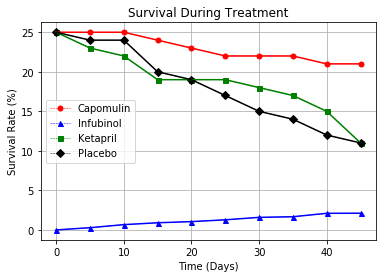

In [41]:
# Generate the Plot (Accounting for percentages)
x_axis=survival_pivot_df.index.values
y_capomulin=survival_pivot_df["Capomulin"]
y_Ifubinol=survival_pivot_df["Infubinol"]
y_Ketapril=survival_pivot_df["Ketapril"]
y_Placebo=survival_pivot_df["Placebo"]
#xerr=0.1
#yerr=pivot_meta_sem_df["Capomulin"]
fig, ax = plt.subplots()
ax.errorbar(x_axis, y_capomulin, color='red')
Capomulin,=plt.plot(x_axis,y_capomulin,color="red",marker='o',markersize=5, linestyle='--', linewidth=0.5)
yerr=pivot_meta_sem_df["Infubinol"]
ax.errorbar(x_axis, y_Infubinol, color='blue')
Infubinol,=plt.plot(x_axis,y_Infubinol,color="blue", marker='^',markersize=5, linestyle='--', linewidth=0.5)
yerr=pivot_meta_sem_df["Ketapril"]
ax.errorbar(x_axis, y_Ketapril, color='green')
Ketapril,=plt.plot(x_axis,y_Ketapril,color="green",marker='s',markersize=5, linestyle='--', linewidth=0.5)
yerr=pivot_meta_sem_df["Placebo"]
ax.errorbar(x_axis, y_Placebo, color='black')
Placebo,=plt.plot(x_axis,y_Placebo,color="black",marker='D', markersize=5, linestyle='--', linewidth=0.5)
ax.set_xlabel('Time (Days)')
ax.set_ylabel('Survival Rate (%)')
ax.set_title('Survival During Treatment')
ax.xaxis.grid(True)
ax.yaxis.grid(True)
plt.legend(handles=[Capomulin,Infubinol,Ketapril,Placebo],loc="best")
# Save the Figure
plt.savefig("Images/Metastatic.png")
#plt.tight_layout()
#plt.show()


## Summary Bar Graph

In [42]:
# Calculate the percent changes for each drug
tumor_percentage=((pivot_table.iloc[-1]-pivot_table.iloc[0])/pivot_table.iloc[0])*100
# Display the data to confirm
tumor_percentage


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

[-19.475302667894173, -22.320900462766673]
[42.51649185589744, 46.12347172785187, 57.028794686606076, 53.92334713476923, 51.29796048315153, 47.24117486320637, 52.085134287899024, 46.57975086509525]


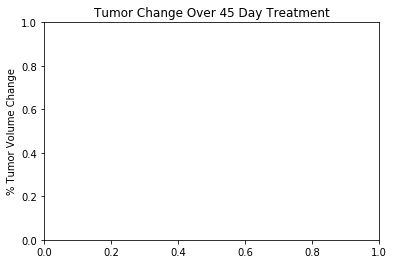

In [43]:
# Store all Relevant Percent Changes into a Tuple
new_tuple = tuple(tumor_percentage)
drug_name = tumor_percentage.index


# Splice the data between passing and failing drugs

passing_drug=[]
failing_drug=[]
for i in new_tuple:
    if i>=0:
        failing_drug.append(i)
    else:
        passing_drug.append(i)
print(passing_drug)
print(failing_drug)
        
# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")
plt.savefig("% Tumor Volume Change")
plt.show()


# Show the Figure
#fig.show()

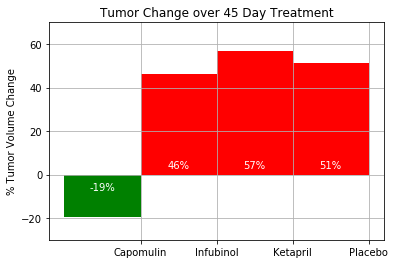

In [47]:
# Splice the data between passing and failing drugs
passing = tumor_percentage < 0

# Orient widths. Add labels, tick marks, etc. 
drug_list = ['Capomulin','Infubinol','Ketapril','Placebo']
change_list = [(tumor_percentage[durg])for durg in drug_list]
change_plt = plt.bar(drug_list,change_list,width=-1,align='edge',color=passing.map({True:'g',False:'r'}))
plt.grid()
plt.ylim(-30,70)
plt.ylabel('% Tumor Volume Change')
plt.title('Tumor Change over 45 Day Treatment')

# Use functions to label the percentages of changes
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        if height > 0:
            label_position = 2
        else:
            label_position = -8
        plt.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d' % int(height)+'%',color='white',
                ha='center', va='bottom')
                
# Call functions to implement the function calls
autolabel(change_plt)

# Save the Figure

plt.savefig("Images/tumor_change_over_45day_treatment.png")